In [3]:
""" Trains an agent with (stochastic) Policy Gradients on Pong. Uses OpenAI Gym. """
import numpy as np
import cPickle as pickle
import tensorflow as tf
import gym
from matplotlib import pyplot as plt
# hyperparameters
H = 200 # number of hidden layer neurons
batch_size = 10 # every how many episodes to do a param update?
learning_rate = 1e-4
gamma = 0.99 # discount factor for reward
# gamma = 1-0.
decay_rate = 0.99 # decay factor for RMSProp leaky sum of grad^2
resume = True # resume from previous checkpoint?
# resume = False;
render = False
# render = True
backlen=20;

def sigmoid(x): 
  return 1.0 / (1.0 + np.exp(-x)) # sigmoid "squashing" function to interval [0,1]

def prepro(I):
  """ prepro 210x160x3 uint8 frame into 6400 (80x80) 1D float vector """
  I = I[35:195] # crop
  I = I[::2,::2,0] # downsample by factor of 2
  I[I == 144] = 0 # erase background (background type 1)
  I[I == 109] = 0 # erase background (background type 2)
  I[I != 0] = 1 # everything else (paddles, ball) just set to 1
  return I.astype(np.float).ravel()

def discount_rewards(r):
  """ take 1D float array of rewards and compute discounted reward """
  discounted_r = np.zeros_like(r)
  running_add = 0
  for t in reversed(xrange(0, r.size)):
    if r[t] != 0: running_add = 0 # reset the sum, since this was a game boundary (pong specific!)
    running_add = running_add * gamma + r[t]
    discounted_r[t] = running_add
  return discounted_r

def policy_forward(x):
  h = np.dot(model['W1'], x)
  h[h<0] = 0 # ReLU nonlinearity
  logp = np.dot(model['W2'], h)
  p = sigmoid(logp)
  return p, h # return probability of taking action 2, and hidden state

def policy_backward(eph, epdlogp):
  """ backward pass. (eph is array of intermediate hidden states) """
  dW2 = np.dot(eph.T, epdlogp).ravel()
  dh = np.outer(epdlogp, model['W2'])
  dh[eph <= 0] = 0 # backpro prelu
  dW1 = np.dot(dh.T, epx)
  return {'W1':dW1, 'W2':dW2}
def lookback(lst):
    lst = lst[-backlen:];
#     np.pad(lst,(20-lst.size,), 'constant', constant_values=0);
    if len(lst) != backlen:
        lst = [None]*(backlen-len(lst)) + lst;
    return(lst)

def time_rewards(r):
    """ take 1D float array of rewards and compute discounted reward """
    discounted_r = np.zeros_like(r)
    running_add = 0
    grad = 0;
    for t in reversed(xrange(0, r.size)):
#         grad = grad * gamma + r[t] ;
        if r[t] != 0: 
            running_add = 0 # reset the sum, since this was a game boundary (pong specific!)
            grad = 2 * (r[t] > 0) - 1; 
        running_add = running_add + grad;
        discounted_r[t] = running_add
    return discounted_r

In [2]:
# discount_rewards(epdlogp)
x.size
%matplotlib inline
plt.close('all')
fig=plt.figure(figsize=[10,10])
ax1=plt.subplot()
# ax1.plot(time_epr)
# ax1.plot(discounted_epr)
ax1.scatter(abs(time_epr),eptpred)
# ax1.set_xlim([0, 200])
# ax1.set_xlim([800, 1000])
# ax1.set_ylim([-10, 000])


# ax1.imshow(eph[:500,:500].T)
time_epr.size
# tpreds.size
D1



NameError: name 'x' is not defined

* Initiliase topology
* set input and output
* set optimiser
* set routine


In [4]:
# model initialization
resume = 1;
# resume = True;
render = False;
render = True;
H=5;
gamma = 0.99;
D1=80;D2=80;
D = 80 * 80 # input dimensionality: 80x80 grid

In [76]:
# tf.reset_default_graph()

from keras.layers import Input, Dense, convolutional,core,concatenate,Flatten
from keras.models import Model,load_model
from keras.models import model_from_json
from keras import backend as K
import keras

def quickax():
    fig = plt.figure(figsize=[8,8])
    ax1 = fig.add_subplot(221)
    return ax1
def savemodel(m,ModelFile):
    # serialize model to JSON
    model_json = m.to_json()
    with open(ModelFile+'.json', "w") as json_file:
        json_file.write(model_json)
    # serialize weights to HDF5
    model.save_weights(ModelFile+'.h5')
    pickle.dump(losshist,open(ModelFile+'.p', "wb"))
    print("Saved model to disk at "+ModelFile)
# savemodel(model,ModelFile)

# load json and create model
def loadmodel(ModelFile):
    global losshist,episode_number
    json_file = open(ModelFile+'.json', 'r')
    loaded_model_json = json_file.read()
    json_file.close()
    loaded_model = model_from_json(loaded_model_json)
    # load weights into new model
    loaded_model.load_weights(ModelFile+'.h5')
#     print("Saved model to disk at "+ModelFile)
    losshist = pickle.load(open(ModelFile+'.p', 'rb'))
    episode_number = len(losshist.losses);
    print("Model loaded from disk at "+ModelFile)
    return(loaded_model)
# model = loadmodel(ModelFile)
class LossCallback(keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.losses = []

    def on_batch_end(self, batch, logs={}):
        self.losses.append(logs.get('loss'))
class LossHist():
    def __init__(self):
        self.losses=[];
    def add(self,n,loss):
        l = len(self.losses);
        if n == l+1:
            self.losses.append(loss);
        else:
            self.losses += [0]*(n-l);
            self.losses = self.losses[:n];
            self.losses[n-1] = loss;
            print('Loss history has changed ')
    def vis(self,ax):
        ax.plot(self.losses,'-');
        pass

def lossfunc(y_true,y_pred):
    return K.mean(K.mean( K.square( y_pred / (K.abs(y_true)+1) - 1)  )); 
# tpr=time_epr;
def decouple(tpr):
    tpr1=np.maximum(tpr,0);
    tpr2=np.minimum(tpr,0);
    tpr1[tpr1==0]=np.maximum(np.max(tpr1),20);
    tpr2[tpr2==0]=np.minimum(np.min(tpr2),-20);
    tpr2=-tpr2;
    time_epr = np.hstack([tpr1,tpr2])
    return(time_epr)


In [74]:
x_input = Input(shape=(D1,D2,1,))
po_input = Input(shape=(1,));
conv1 = convolutional.Conv2D(filters=H,
                             kernel_size=(4,4),
                            strides=(1,1),
                            padding='same',
                            activation='relu')(x_input)
den1 = Flatten()(Dense(units=5*H,
             activation='relu')(conv1))

den1c = concatenate([den1,po_input]);
score = Dense(units=2,
              activation = 'relu')(den1c)

model = Model(inputs=[x_input,po_input], outputs=[score])

optimiser = keras.optimizers.RMSprop(lr=learning_rate, rho=0.9, epsilon=1e-08, decay=0.0)
model.compile(optimizer='rmsprop',
              loss=lossfunc)
history = LossHistory()
# log = model.fit([epx,epy], time_epr,callbacks=[history])
# loss = model.train_on_batch([epx,epy], time_epr)
# print(history.losses[-1])
# x = Dense(64, activation='relu')(x_input)

In [75]:
env = gym.make("Pong-v0")
observation = env.reset()
prev_x = None # used in computing the difference frame
xs,hs,dlogps,drs = [],[],[],[]
ys=[];byss=[];rss=[];tpreds=[];
running_reward = None
reward_sum = 0
episode_number = 0

[2017-06-05 17:39:55,736] Making new env: Pong-v0


In [28]:
# xinput.shape
# del model

In [49]:
# all_vars
# tf.get_tensor_by

<function tensorflow.python.ops.variable_scope.get_variable>

In [77]:
ModelName = '2event_RL_pong_RMSprop_acumul'
ModelFile = 'Models/'+ModelName+'.ckpt';
render = False;
resume = 0;
batch_size=1;
learning_rate = 1e-2
optimiser = keras.optimizers.RMSprop(lr=learning_rate, rho=0.9, epsilon=1e-08, decay=0.0)
episode_number = 0;

# ModelName='save.ckpt'
# fname = 
# with tf.Session() as sess:
# gdcmd='grad_dict = {'+','.join(['Grad%d: gradBuffer[%d]'%(i,i) for i,k in enumerate(tvars)])+'}';
if True:
    if resume:
        model = loadmodel(ModelFile)
#         print("Model loaded from disk at "+ModelFile)
    
    model.compile(optimizer='rmsprop',
                  loss=lossfunc)
    while episode_number<1:
        if render: env.render()

        # preprocess the observation, set input to network to be difference image
        cur_x = prepro(observation)
        diff_x = cur_x - prev_x if prev_x is not None else np.zeros(D)
        prev_x = cur_x
        x = np.reshape(diff_x,[1,D1,D2,1]);
#         aprob = sess.run(probability,feed_dict={observations: x})
        aprob = 0.5;
#         tpred = sess.run(score,feed_dict={observations: x})    
        action = 2 if np.random.uniform() < aprob else 3 # roll the dice!
        y = 1 if action == 2 else 0 # a "fake label"

        tpred = model.predict([x,np.array([[y]])]);
#         tpred = model.predict({'input_1':x,'input_2':np.array([[y]])});
        

        # record various intermediates (needed later for backprop)
        xs.append(x) # observation
        ys.append(y)
        tpreds.append(tpred);

        # step the environment and get new measurements
        observation, reward, done, info = env.step(action)
        reward_sum += reward
        drs.append(reward) # record reward (has to be done after we call step() to get reward for previous action)

        if done: # an episode finished
            episode_number += 1

            # stack together all inputs, hidden states, action gradients, and rewards for this episode
            epx = np.vstack(xs)
            epy = np.vstack(ys);
            epr = np.vstack(drs)
            eptpred=np.vstack(tpreds);
            xs,hs,dlogps,drs,ys,tpreds = [],[],[],[],[],[] # reset array memory
            
            tpr=time_rewards(epr);
            time_epr = decouple(tpr);
            curr_loss = model.train_on_batch([epx,epy], time_epr)

            if episode_number % batch_size == 0:
                #accumulate gradient over batch 
                pass
   
            # boring book-keeping
            running_reward = reward_sum if running_reward is None else running_reward * 0.99 + reward_sum * 0.01
            print 'resetting env. episode %d reward total was %f. loss_func: %f' % (episode_number, reward_sum, curr_loss)
            if episode_number % 10  == 9: 
                savemodel(model,ModelFile)
#                 model.save(ModelFile)
                print("Saved model to disk at "+ModelFile)
        
            reward_sum = 0
            observation = env.reset() # reset env
            prev_x = None
            #     print ('ep %d: game finished, reward: %f' % (episode_number, reward)) + ('' if reward == -1 else ' !!!!!!!!')
#     break

KeyboardInterrupt: 

/home/shouldsee/.local/lib/python2.7/site-packages/ipykernel/__main__.py:17: RuntimeWarning: divide by zero encountered in divide


(1400, 1800)

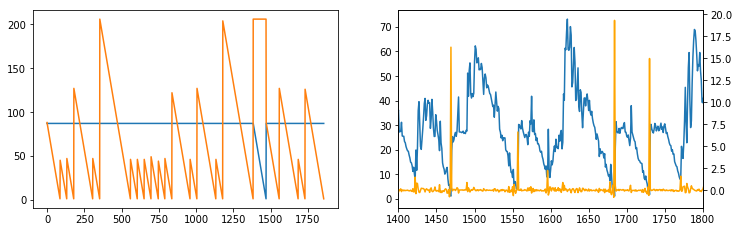

In [68]:
# model.predict([x,np.array([y])])
# discount_rewards(epdlogp)
x.size
%matplotlib inline
plt.close('all')
fig=plt.figure(figsize=[12,8])
ax1=plt.subplot(221)
ax2=plt.subplot(222)

# ax1.plot(abs(time_epr))
# ax1.plot(eptpred)
ax1.plot(tpr1)
ax1.plot(tpr2)

ax2.plot(eptpred[:])
ax2b = ax2.twinx();
ax2b.plot(np.diff(eptpred,axis=0)/eptpred[:-1],'orange')

# ax1.plot(-(epspred-.5)*2*(eptpred-1))

# ax1.scatter(abs(time_epr),eptpred)
# ax1.set_xlim([1000,
#               1400])
ax2.set_xlim([1400,
              1800])
# ax1.set_xlim([500, 1000])
# ax1.set_xlim([0,500])
# ax1.set_ylim([-0, 50])


# ax1.imshow(eph[:500,:500].T)
# tpreds.size


In [19]:
# print(time_epr.ravel())
# time_epr
# tpreds
# H
# np.expand_dims(epx,1).shape
# curr_loss = sess.run(loss,feed_dict={xinput: epx, input_y: epy, rtime: time_epr});
# epx.shape
# tf.reshape(epy);
# D*H
# oSaver = tf.train.Saver()
print(sess.run(score,feed_dict={xinput: epx, input_y: epy, rtime: time_epr}))
# oSess = sess
# oSaver.save(oSess, ModelFile)

[[ nan]
 [ nan]
 [ nan]
 ..., 
 [ nan]
 [ nan]
 [ nan]]


In [38]:
# np.diff(eptpred,axis=0)

array([[ 22.87527084],
       [-22.95979881],
       [  1.01246071],
       ..., 
       [ -1.03188419],
       [ -0.30332661],
       [  1.35697651]], dtype=float32)